In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') #忽视警告

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')  # 解决Seaborn中文显示问题


In [3]:
df = pd.read_excel("D:\\teaching\\New Media Analysis and User Experience\\survey\\inm.xlsx")

In [4]:
def gender(series):
    if series == 1:
        return '男性'
    else:
        return '女性'

def hukou(series):
    if series == 1:
        return '城镇'
    else:
        return '非城镇'

def location (series):
    if series == 1:
        return "非广东地区"
    elif series == 2:
        return "珠三角地区"
    elif series == 3:
        return "粤东"
    elif series == 4:
        return "粤西"
    else:
        return "粤北"

def like(series):
    if series == 1:
        return '喜欢'
    else:
        return '不喜欢'

def impr(series):
    if series == 1:
        return '有提升空间'
    else:
        return '挺好的'

    

In [5]:
df.gender = df.gender.apply(gender)
# df.gender.value_counts()

df.hukou = df.hukou.apply(hukou)
# df.hukou.value_counts()

df.location = df.location.apply(location)
# df.location.value_counts()

# 直方图

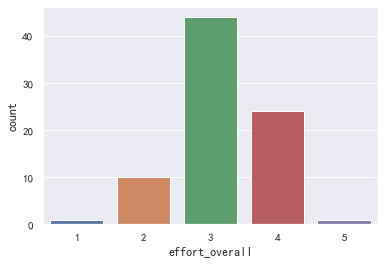

In [16]:
sns.countplot(x = "effort_overall", data = df)

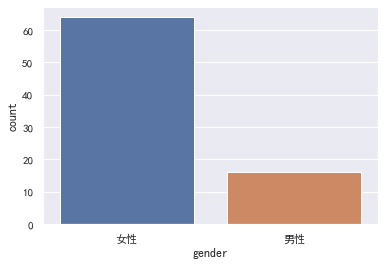

In [19]:
sns.countplot(x="gender", data=df)

# 均值比较

## t检验结果可视化

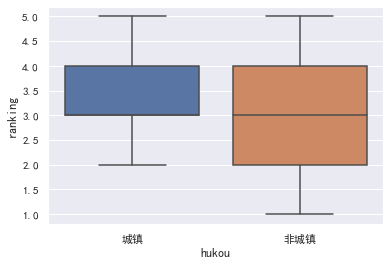

In [7]:
sns.boxplot(x = 'hukou', y = 'ranking', data = df) 

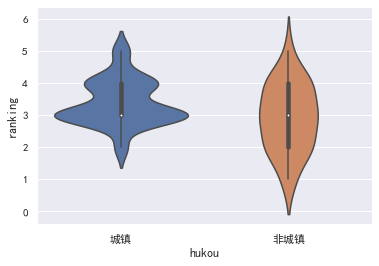

In [8]:
sns.violinplot(x = 'hukou', y = 'ranking', data = df) 

## 方差分析结果可视化

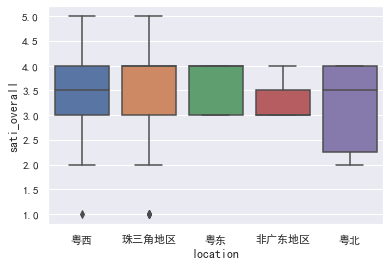

In [27]:
sns.boxplot(x = 'location', y = 'sati_overall', data = df) 

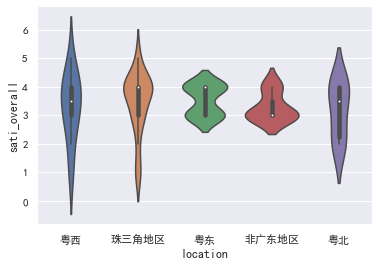

In [9]:
sns.violinplot(x = 'location', y = 'sati_overall', data = df) 

# 可视化相关关系

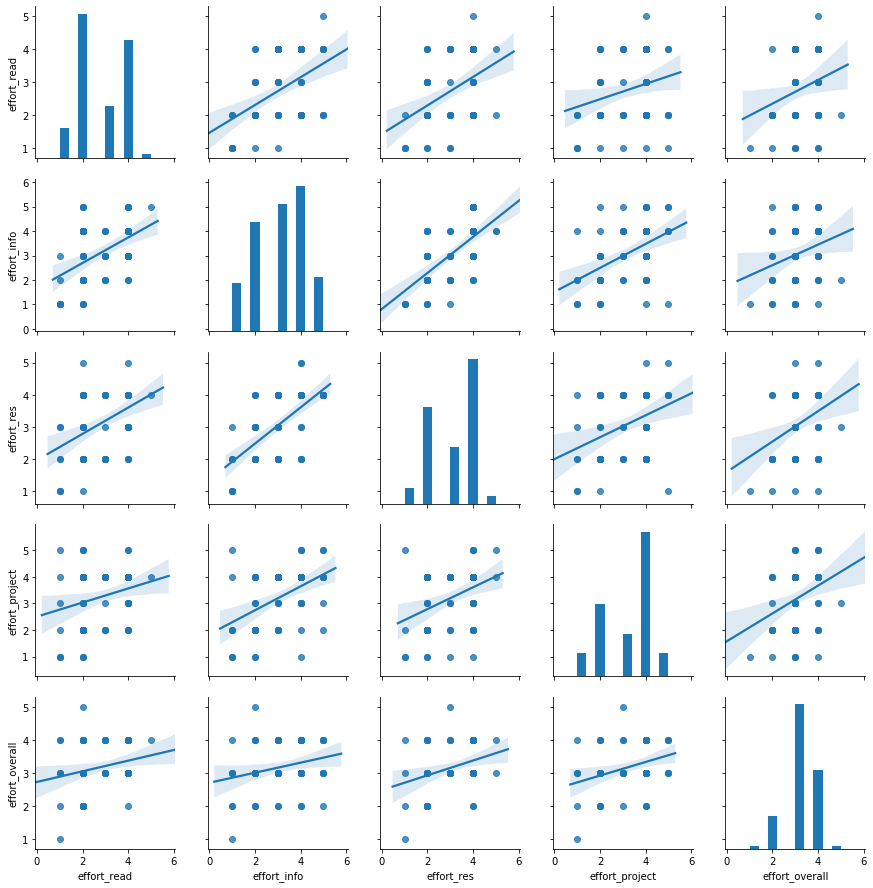

In [11]:
sns.pairplot(df.filter(regex="effort_*"), kind="reg")

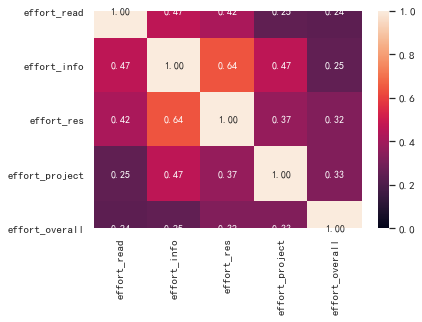

In [6]:
# 各种努力方式的相关分析
corr_result = df.filter(regex="effort_*").corr()

# 可视化
sns.heatmap(corr_result, annot=True, fmt='.2f', vmin=0, vmax=1,xticklabels=True, yticklabels=True)

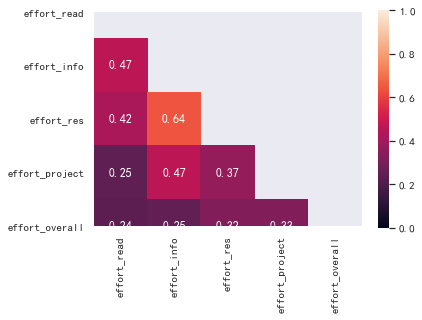

In [23]:
# Can be great to plot only a half matrix
mask = np.zeros_like(corr_result)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_result, mask=mask, square=True,vmin=0, vmax=1,annot=True, fmt='.2f')

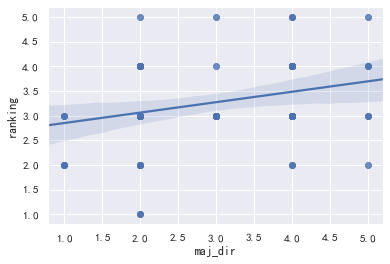

In [13]:
sns.regplot(x = "maj_dir", y = "ranking", data = df)

# 可视化卡方检验结果